<a href="https://colab.research.google.com/github/Taiba528/Datasciencecoursera/blob/master/KAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Kap data_analysis.xlsx to Kap data_analysis.xlsx


In [ ]:
df = pd.read_excel("Kap data_analysis.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            302 non-null    object 
 1   age                             301 non-null    float64
 2   source                          293 non-null    object 
 3   Education                       295 non-null    object 
 4   occupation                      296 non-null    object 
 5   Anxiety score                   277 non-null    float64
 6   Knowledge(general)              302 non-null    float64
 7   Knoweldeg (pregnancy)           302 non-null    float64
 8   changes to mat unit             301 non-null    float64
 9   hope of control                 302 non-null    float64
 10  contact exposure                302 non-null    object 
 11  concern of infection            302 non-null    float64
 12  concern of infection to baby    302 

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Explore Data


In [ ]:
#Explore Data
df.shape
type(df)
df.size
df.shape
df.head()
df.tail()

(303, 25)

pandas.core.frame.DataFrame

7575

(303, 25)

,name,age,source,Education,occupation,Anxiety score,Knowledge(general),Knoweldeg (pregnancy),changes to mat unit,hope of control,contact exposure,concern of infection,concern of infection to baby,concern mode of delivery,Response to change in care,practice in general,response to contact exposure,response to contact exposure.1,visit after prior infrma,response if positive,(directly),hand wash,face shield /cover,expressed milk,practice(pregnency)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P_1,31.0,news/ social,graduate,HW,5.0,5.0,0.0,0.0,1.0,0,1.0,0.0,1.0,0,2.0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,6.0
2,P_2,30.0,news,graduate,working,0.0,6.0,2.0,1.0,1.0,0,1.0,1.0,0.0,0,2.0,0.0,1.0,1.0,1.0,0,1.0,1.0,0.0,5.0
3,P_3,36.0,news/ social,NaN,NaN,NaN,6.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0,1.0,0.0,1.0,1.0,1.0,0,0.0,0.0,0.0,3.0
4,P_4,29.0,news,doctor,working,4.0,6.0,3.0,1.0,1.0,0,1.0,1.0,0.0,1,2.0,1.0,1.0,1.0,1.0,0,1.0,1.0,0.0,5.0


,name,age,source,Education,occupation,Anxiety score,Knowledge(general),Knoweldeg (pregnancy),changes to mat unit,hope of control,contact exposure,concern of infection,concern of infection to baby,concern mode of delivery,Response to change in care,practice in general,response to contact exposure,response to contact exposure.1,visit after prior infrma,response if positive,(directly),hand wash,face shield /cover,expressed milk,practice(pregnency)
298,P_298,32.0,news/ social,graduate,HW,0.0,5.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,2.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,3.0
299,P_299,32.0,news/ social,graduate,HW,4.0,3.0,0.0,1.0,1.0,0,0.0,0.0,1.0,1,2.0,1.0,0.0,0.0,1.0,1,1.0,1.0,1.0,5.0
300,P_300,33.0,news/ social,graduate,working,4.0,6.0,4.0,1.0,1.0,0,0.0,1.0,1.0,0,2.0,0.0,1.0,1.0,1.0,0,1.0,1.0,1.0,6.0
301,P_301,34.0,news/ social,MBA,HW,5.0,6.0,0.0,1.0,0.0,0,1.0,0.0,0.0,1,2.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,7.0
302,P_302,30.0,news/ social,primary,HW,3.0,6.0,1.0,0.0,0.0,0,0.0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [ ]:
df.Education.value_counts()

graduate    113
masters      62
primary      35
MBA          27
Masters      17
12th         13
doctor       10
B tech        7
dentist       3
nursing       2
denist        2
matric        1
PHD           1
phd           1
Lawyer        1
Name: Education, dtype: int64

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

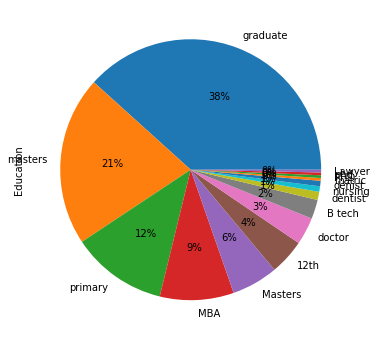

In [ ]:
df.Education.value_counts().plot(kind='pie', autopct='%1.0f%%')

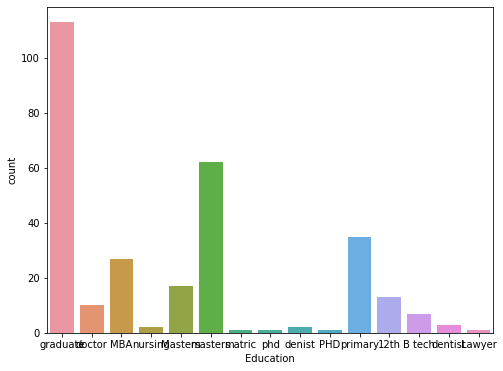

In [ ]:
sns.countplot(x = 'Education',data=df)

In [ ]:
df_new= df.dropna(how = 'all')

In [ ]:
df_new['Ratings_category'] = df_new['Star_Ratings'].apply(lambda Ratings: 'positive' if Ratings > 3 else 'negative')
df_new.head(3)

In [ ]:
df_new.Ratings_category.value_counts()

In [ ]:
df_new.Ratings_category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "red",])

In [ ]:
df_new_positive=df_new[df_new['Ratings_category'] == 'positive']
df_new_negative=df_new[df_new['Ratings_category']=='negative']

In [ ]:
Reviews_all=" ".join(review for review in df_new.Ratings_category)
Reviews_positive=" ".join(review for review in df_new_positive.Reviews)
Reviews_negative=" ".join(review for review in df_new_negative.Reviews)


In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
fig, ax = plt.subplots(3, 1, figsize  = (20,20))
#wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Reviews_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Reviews_negative)
# Display the generated image:
ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Positive Reviews', fontsize=20)
ax[0].axis('off')
ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Negative Reviews',fontsize=20)
ax[1].axis('off')

In [ ]:
word_list = []

max = len(df_new.Reviews)
for i in range (max):
  R1= df_new.Reviews[i]
  tokens = R1.split()
  #print(tokens)
  words = []
  
  for token in tokens:
    words.append(token.lower())
  word_list.append(words) 
print(len(word_list))
word_list[0:5]

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [ ]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
    


In [ ]:
#For each word in text
#Get the word score (score is a number if the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
sentiment_score = []
for text in word_list:
    score = 0
    for word in text:
        if word in (lexicons):
            score = int(score + lexicons[word])
    sentiment_score.append(score)
sentiment_score[5]

In [ ]:
df_new['sentiment_score'] = sentiment_score
df_new.head()

In [ ]:
df_new['Pred_Ratings_category'] = df_new['sentiment_score'].apply(lambda sentiment_score: 'positive' if sentiment_score > 0 else 'negative')
df_new.head()

In [ ]:
df_new.to_csv('C:\\Users\HP\Desktop\IIMB.csv')

In [ ]:
df_new.Pred_Ratings_category.value_counts()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df_new['Ratings_category'],df_new['Pred_Ratings_category'])

In [ ]:
df_1 = df_new[['Reviews','sentiment_score','Star_Ratings']]
df_1.head(3)

In [ ]:
df_1.to_csv('C:\\Users\HP\Desktop\IIMB.csv')

## Creating Labels and Features to apply ML models

In [ ]:
x = df_1.iloc[:, 0]
x.head()

In [ ]:
y = df_1.iloc[:, -1]
y.head()

In [ ]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 

In [ ]:
# To extract max 1500 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer(max_features = 1500)  
  

In [ ]:
X = cv.fit_transform(x).toarray()  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [ ]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

# KNN model

In [ ]:
#KNN models with only 1 neighbour
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [ ]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Random Forest 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:

# Fitting Random Forest Classification 
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 
  
# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results  
model = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
model.fit(X_train, y_train) 

In [ ]:
# Predicting the Test set results 
y_pred = model.predict(X_test)  

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
fig, ax = plt.subplots(3, 1, figsize  = (20,20))
# Create and generate a word cloud image:
df_new_positive=df[df['Ratings_category'] == 'positive']
df_new_negative=df[df['Ratings_category']=='negative']
tweet_all=" ".join(review for review in df.Tweet)
tweet_positive=" ".join(review for review in df_positive.Tweet)
tweet_negative=" ".join(review for review in df_negative.Tweet)
tweet_neutral=" ".join(review for review in df_neutral.Tweet)
#wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_negative)
wordcloud_neutral = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_neutral)
# Display the generated image:
ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Positive Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Negative Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_neutral, interpolation='bilinear')
ax[2].set_title('Neutral Tweets',fontsize=30)
ax[2].axis('off')


In [ ]:
df_neutral=df[df['Ratings_category']=='neutral']

In [ ]:
text = []
f_in = open("Amazon Reviews with Ratings.csv",'r')
for line in f_in.readlines():
    text.append(line)
f_in.close()

In [ ]:
corpus = [] #Create an empty corpus
ps = PorterStemmer() # For Stemming the words to original form
stop_words = set(stopwords.words('english')) # removes words like will, i, and, it etc
for i in range(1,2000):
  #removes handles (@), numbers, urls emojis and any other special charcters to have only text
  text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", ' ',text[i])
  # Convert all words to lower case
  text_cln = text_cln.lower()
  # Split sentences in to words
  text_cln = text_cln.split()
  # Remove english stopwords
  text_cln = [x for x in text_cln if not x in stop_words]
  # Lemmatize words to the base form
  wn = nltk.WordNetLemmatizer()
  text_cln = [wn.lemmatize(x) for x in text_cln]
  # Join words to form the original sentence, but cleaned-up
  text_cln = " ".join(text_cln)
  #Append to the list to get all the tweets in one place
  corpus.append(text_cln)

In [ ]:
#Clean Corpus
corpus[0:5]

In [ ]:
#Strip the records and create a word list for each text
word_list = []
for record in (corpus):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
word_list 

In [ ]:
print(word_list)

In [ ]:
new_word_list = []
for word in word_list:
    if(word in words_remove):
        pass
else:
    new_word_list.append(word)
    print(new_word_list)


In [ ]:
bagofwords = []
for i in range(1,1999):
  words = corpus[i].split()
  bagofwords.append(words)
  

In [ ]:
bagofwords[0]

In [ ]:
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print('Most commonly occuring words and frequency\n')
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

In [ ]:
len(all_words)

In [ ]:
print(all_words[0:10])

In [ ]:
# Remove those words which are not contributing in analysis like star,phone,pro...
words_remove = ['star','phone','pro','one','oneplus','plus','review']
  

In [ ]:
filtered_words = [] 
  
for w in all_words: 
    if w not in words_remove: 
        filtered_words.append(w) 
  
print(all_words) 
print(filtered_words) 

In [ ]:
print('Most commonly occuring words and frequency\n')
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

In [ ]:
freq_word_df = pd.DataFrame(words_freq.most_common(15), columns=['Words','Freq'])
freq_word_df.head()

In [ ]:
text = []
f_in = open("Amazon Reviews with Ratings.csv",'r')
for line in f_in.readlines():
    text.append(line)
f_in.close()

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='Words', y = 'Freq', ax=ax, color = "CRIMSON")
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string= " ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords = STOPWORDS,
                          background_color='WHITE',
                      max_words=20
                         ).generate(word_string)

In [ ]:
plt.figure(figsize=(15,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
sentiment_text = [TextBlob(text) for text in corpus]
print(sentiment_text[5].polarity)
print(sentiment_text[5])

In [ ]:
sentiments = [[text.sentiment.polarity, str(text)] for text in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns = ["Polarity", "text"])
sentiment_df.sort_values(by= 'Polarity', ascending=False)

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
#Plot the histogram of the polarity values
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color = '#2B2CBA')
plt.title